#World Happiness Report - Analysis

This project aims to analyze the variables impacting the happiness levels of
countries and create predictive models to estimate the “Ladder score” based on socio-economic and well-being characteristics.

The dataset is based on the World Happiness Report, which contains data about happiness levels in different countries, evaluated through various metrics including social support, healthy life expectancy, and perceptions of corruption.

#Exploratory Data Analysis (EDA)




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster
import plotly.express as px
from geopy.extra.rate_limiter import RateLimiter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("World-happiness-report-2024.csv", encoding='latin-1')
df.head(20)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [5]:
df.isnull().sum()

,0
Country name,0
Regional indicator,0
Ladder score,0
upperwhisker,0
lowerwhisker,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3


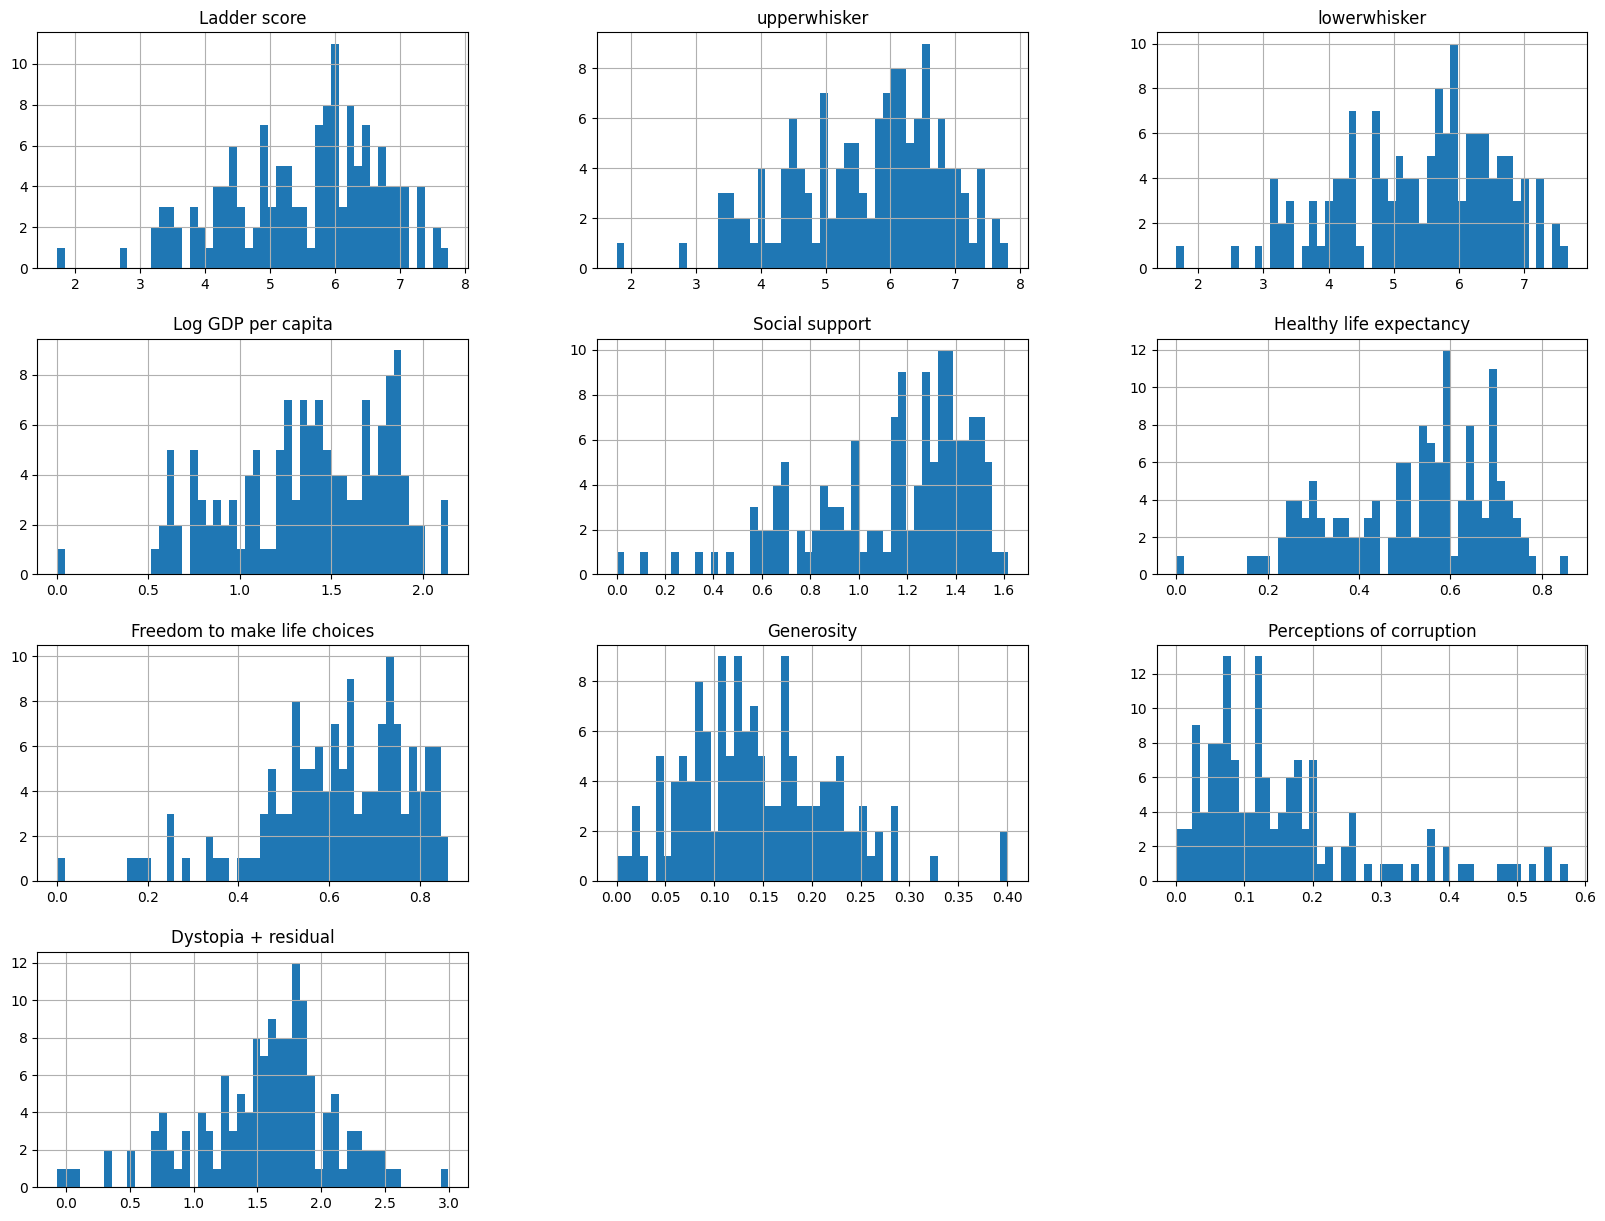

In [6]:
#***Histogram to check the distributions of each variable and decide how to impute the missing values***

df.hist(bins=50, figsize=(20, 15));


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [8]:
# Imputation by the median, because there is skewness in the histograms and the mean does not represent the center of the distributions

for column in ['Log GDP per capita', 'Social support', 'Healthy life expectancy',
               'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual']:
    df[column].fillna(df[column].median(), inplace=True)

In [9]:
df.isnull().sum()

,0
Country name,0
Regional indicator,0
Ladder score,0
upperwhisker,0
lowerwhisker,0
Log GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0


In [10]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.527580,5.641175,5.413972,1.379913,1.136493,0.521486,0.621049,0.146066,0.153416,1.577353
std,1.170717,1.155008,1.187133,0.420652,0.330111,0.163223,0.160793,0.072675,0.124991,0.531842
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.079000,0.924500,0.400000,0.531000,0.092500,0.069000,1.317000
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.733000,1.377000,0.644000,0.734000,0.191500,0.191000,1.879500
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


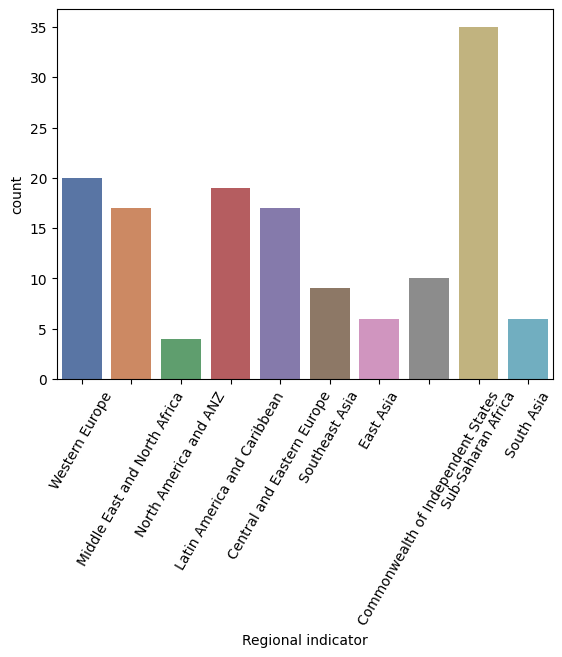

In [11]:
#count regional indicator
sns.countplot(x ='Regional indicator', data = df, hue='Regional indicator', legend=False, palette='deep')
plt.xticks(rotation = 60)
plt.show();

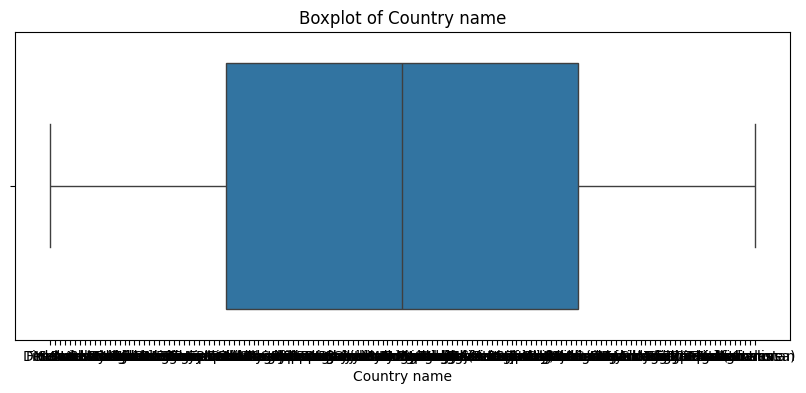

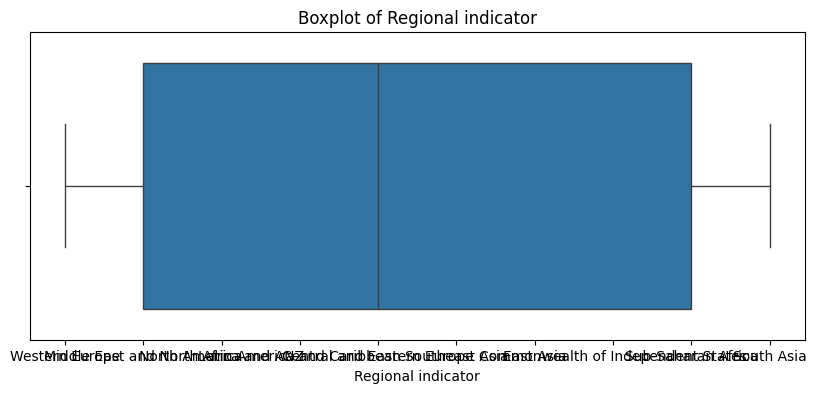

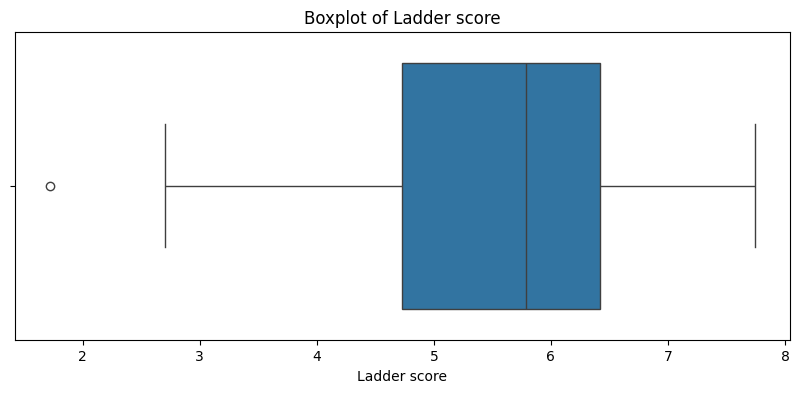

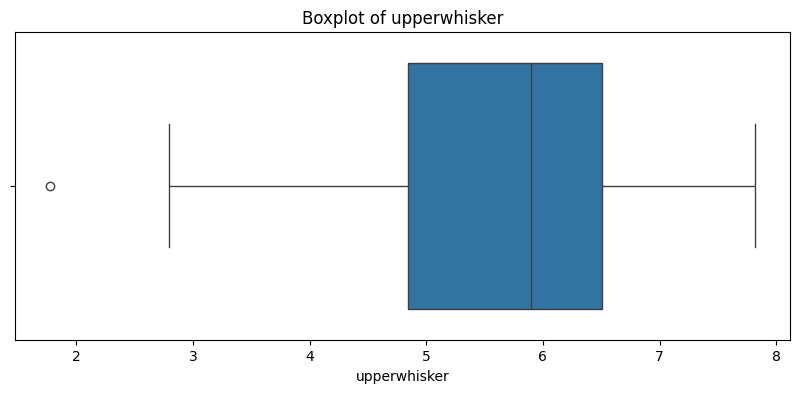

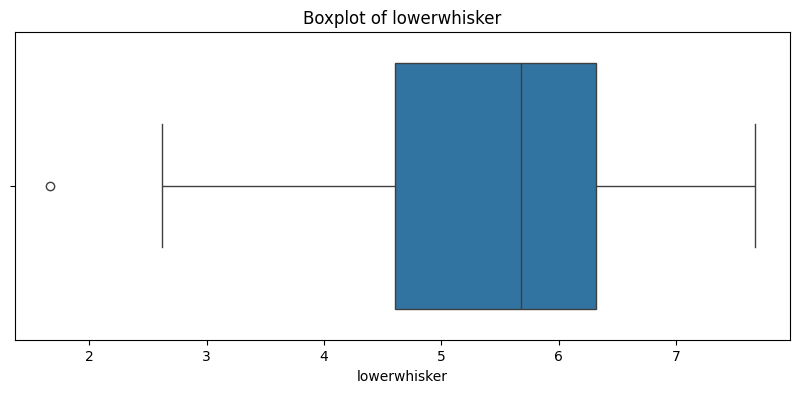

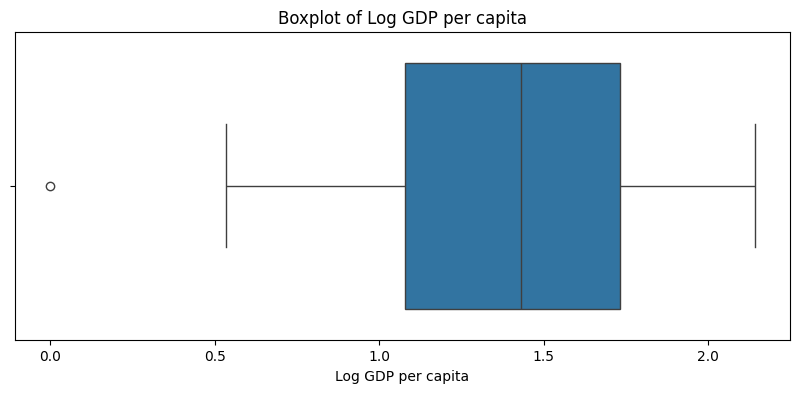

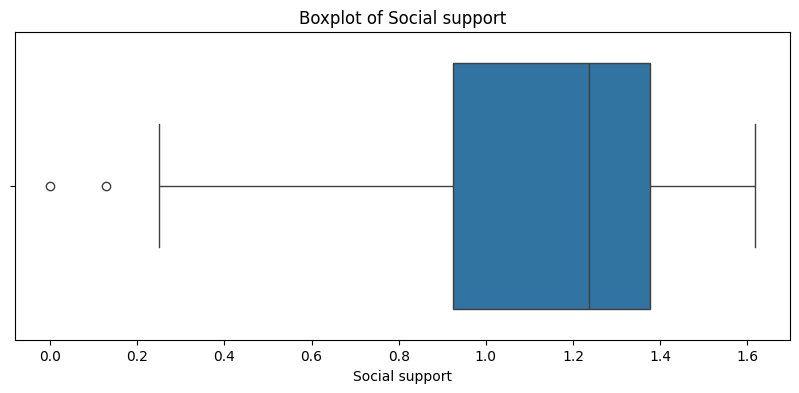

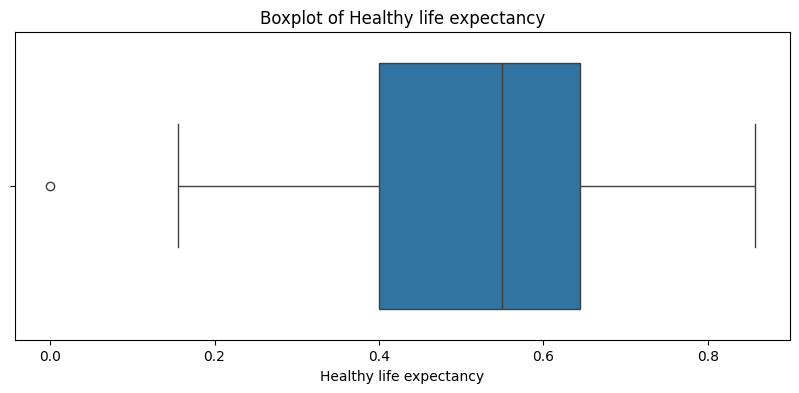

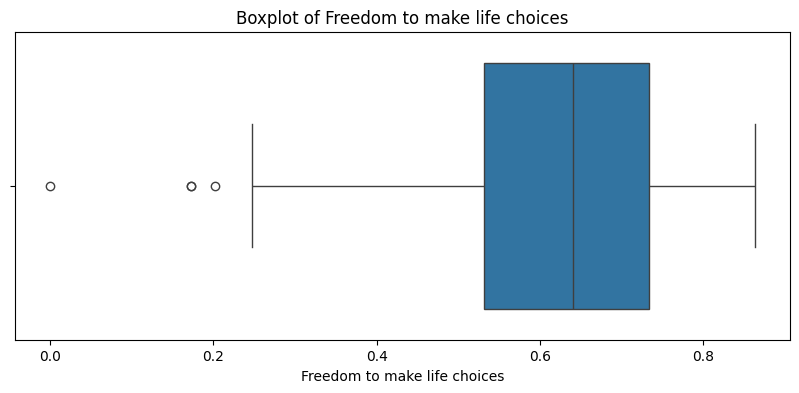

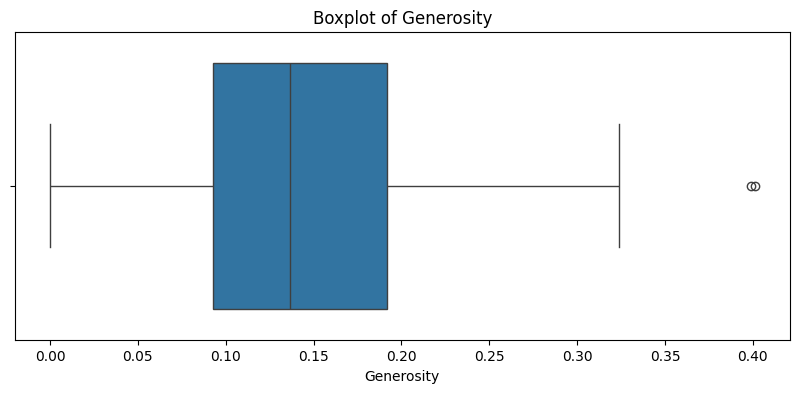

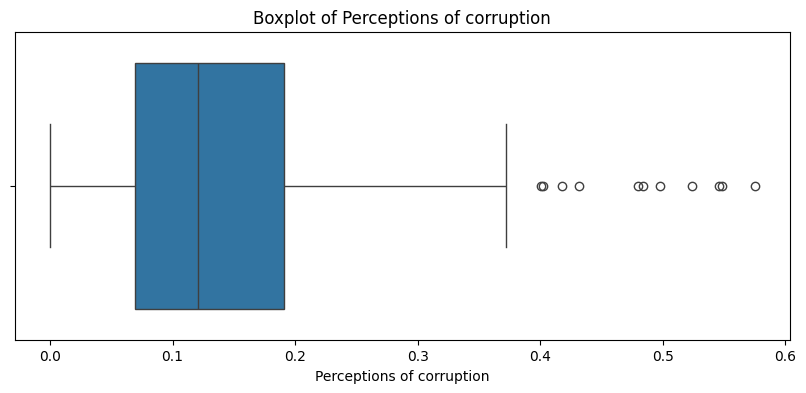

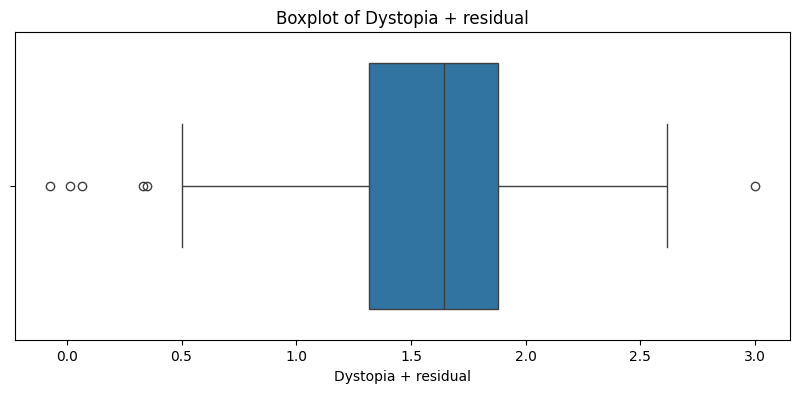

In [12]:
#studying outliers
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

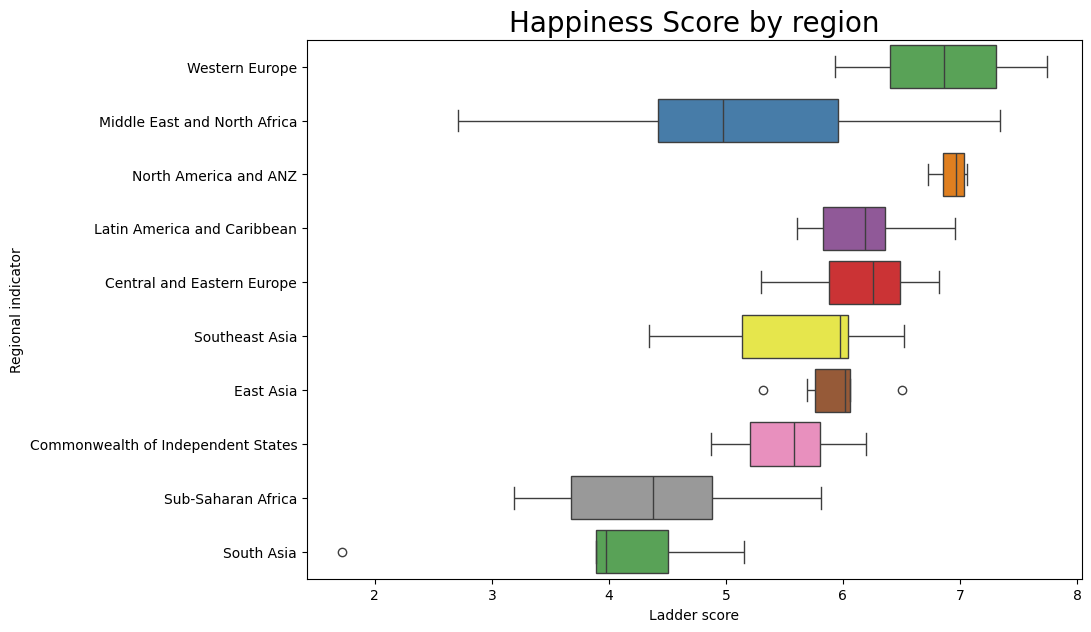

In [13]:
colors = ["#4daf4a", "#377eb8", "#ff7f00", "#984ea3", "#e41a1c", "#ffff33", "#a65628", "#f781bf", "#999999"]
fig = plt.figure(figsize = (10,7))
sns.boxplot(df, y = 'Regional indicator', x = 'Ladder score', palette = colors)
plt.title("Happiness Score by region", size = 20);


*   	Western Europe shows a relatively high median happiness score with moderate variability, indicating a generally high level of happiness with some variance among countries.
*  Middle East and North Africa and Latin America and Caribbean have a wider spread and lower median scores compared to Western Europe, suggesting more variability in happiness levels within these regions.
* South Asia displays the lowest median happiness score, which is consistent with other global happiness reports, often reflecting various socio-economic challenges.




**The correlation matrix is a way to identify how variables relate to the “Ladder score” and to each other.**

In [14]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,0.999678,0.999697,0.766708,0.810450,0.757622,0.642882,0.130165,0.451464,0.532173
upperwhisker,0.999678,1.000000,0.998750,0.759873,0.808365,0.748894,0.644618,0.129653,0.448290,0.540789
lowerwhisker,0.999697,0.998750,1.000000,0.772840,0.811963,0.765552,0.640816,0.130640,0.454282,0.523528
Log GDP per capita,0.766708,0.759873,0.772840,1.000000,0.726800,0.830312,0.415078,-0.059732,0.443125,-0.028774
Social support,0.810450,0.808365,0.811963,0.726800,1.000000,0.707118,0.484890,0.078501,0.248690,0.160129
Healthy life expectancy,0.757622,0.748894,0.765552,0.830312,0.707118,1.000000,0.401347,0.006657,0.397625,0.051980
Freedom to make life choices,0.642882,0.644618,0.640816,0.415078,0.484890,0.401347,1.000000,0.223891,0.343177,0.251045
Generosity,0.130165,0.129653,0.130640,-0.059732,0.078501,0.006657,0.223891,1.000000,0.173252,0.036051
Perceptions of corruption,0.451464,0.448290,0.454282,0.443125,0.248690,0.397625,0.343177,0.173252,1.000000,0.000246
Dystopia + residual,0.532173,0.540789,0.523528,-0.028774,0.160129,0.051980,0.251045,0.036051,0.000246,1.000000


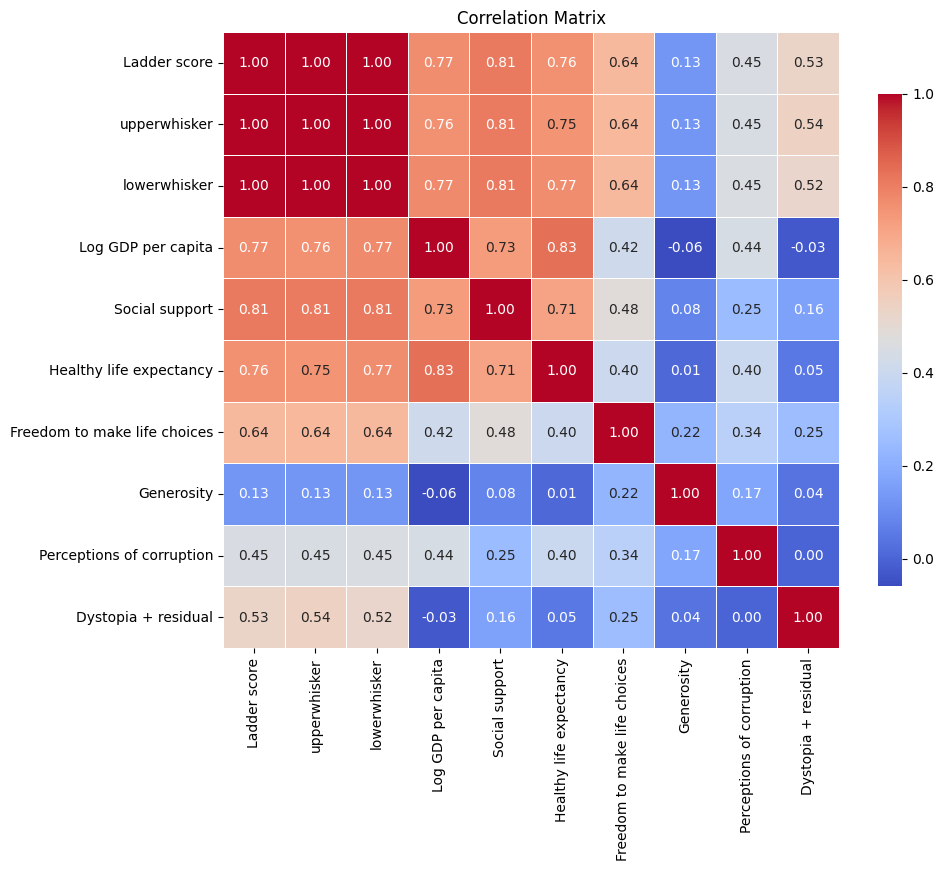

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

* The matrix shows that Log GDP per capita, Social support, and Healthy life expectancy demonstrate strong positive correlations with the Ladder score. This indicates that higher levels of GDP per capita, social support, and healthy life expectancy are associated with higher levels of happiness.
* Freedom to make life choices is moderately correlated with the Ladder score (0.64), suggesting that the perception of freedom is an important factor for happiness.

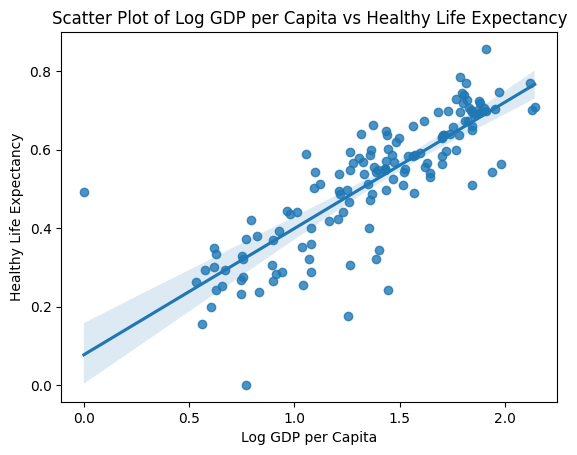

In [16]:
sns.regplot(x='Log GDP per capita', y='Healthy life expectancy', data=df)
plt.title('Scatter Plot of Log GDP per Capita vs Healthy Life Expectancy')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Healthy Life Expectancy')
plt.show()

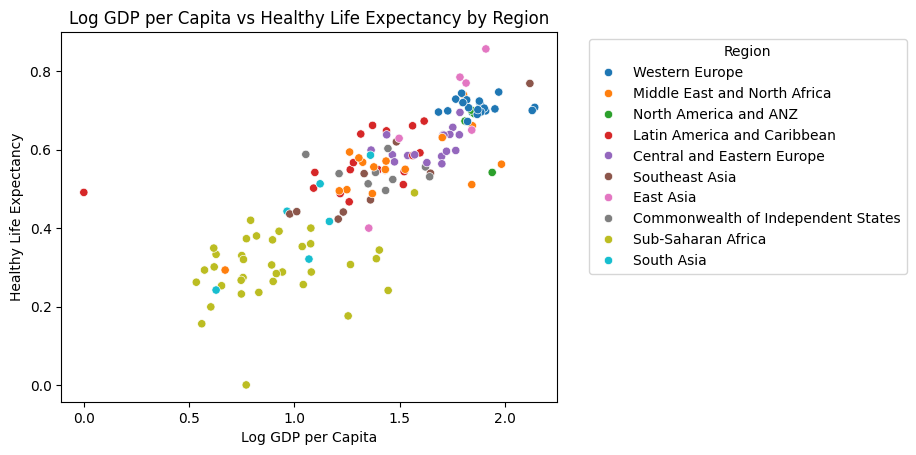

In [17]:
#now, lets show by region

sns.scatterplot(x='Log GDP per capita', y='Healthy life expectancy', hue='Regional indicator', data=df)
plt.title('Log GDP per Capita vs Healthy Life Expectancy by Region')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Healthy Life Expectancy')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

in both graphics, we can see that the Healthy Life Expectancy increases with Log GDP per Capita increases

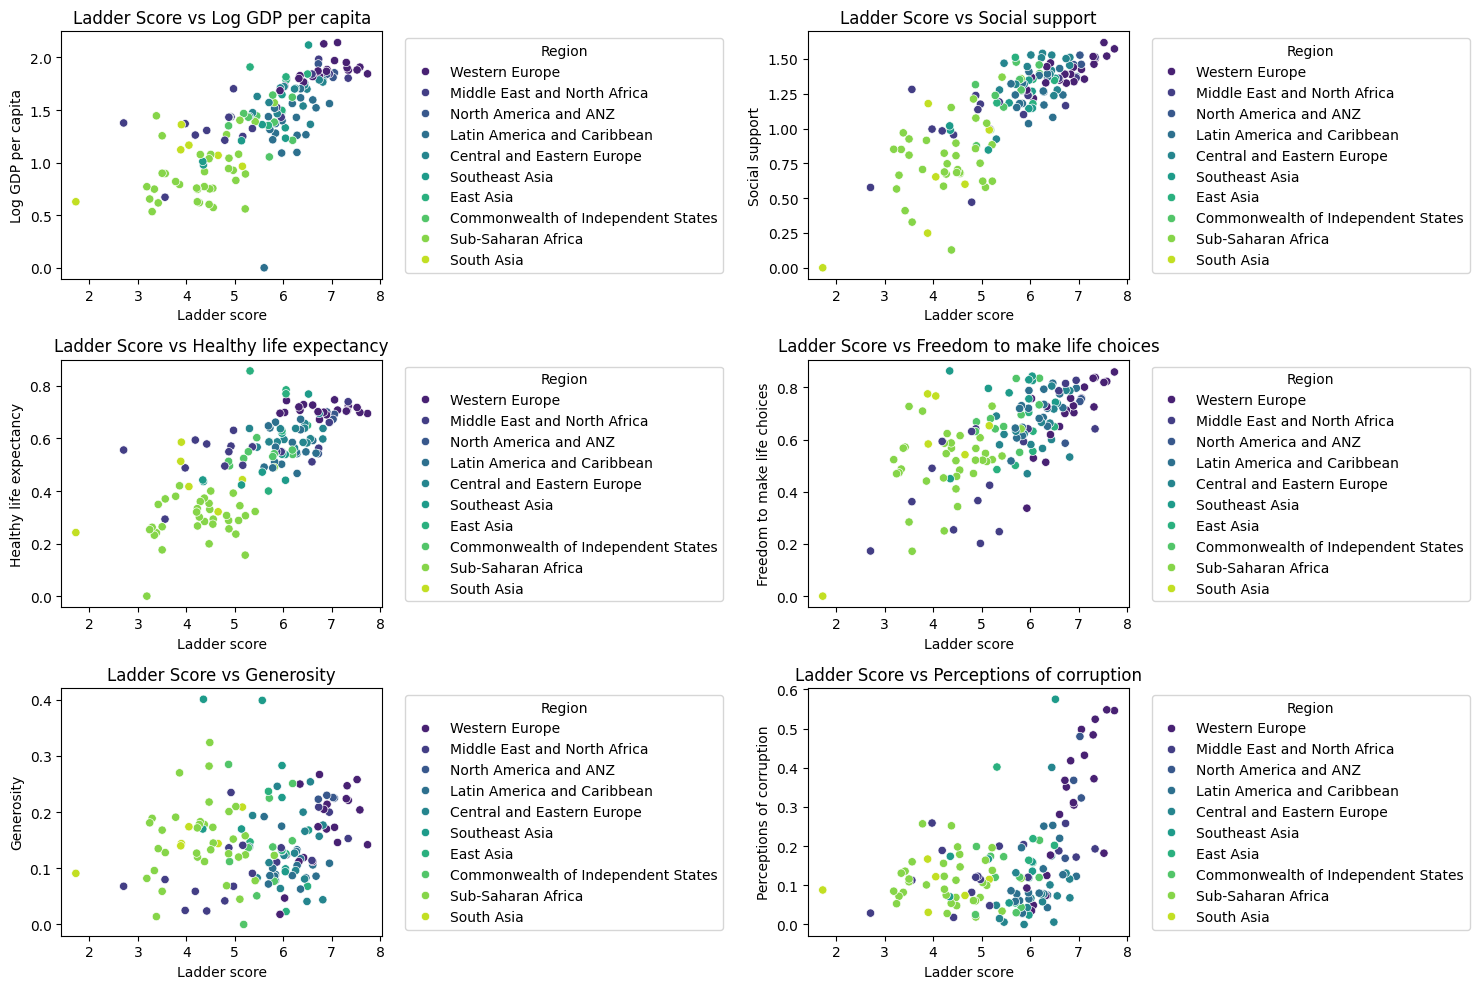

In [35]:
variables = ['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

n_rows = 3
n_cols = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.scatterplot(ax=axes[i], data=df, x='Ladder score', y=var, hue='Regional indicator', palette='viridis')
    axes[i].set_title(f'Ladder Score vs {var}')
    axes[i].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

* There seems to be a trend where higher happiness scores are associated with lower perceptions of corruption. This indicates that in countries perceived as less corrupt, citizens tend to report higher levels of happiness.

#**Predictive Modeling**

**Linear Regression**

In [42]:

X = df[['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption' ]]
y = df['Ladder score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R² score: {r2}')


print('Coeficients:', model.coef_)
print('Intercept:', model.intercept_)

MSE: 0.1842116998855188
R² score: 0.8350788069317227
Coeficients: [0.52078242 1.38644415 0.99025068 2.10179333 1.05802601]
Intercept: 1.226584518470328


Analysis:
* High R2 - goor result

In [43]:
residuals = y_test - y_pred

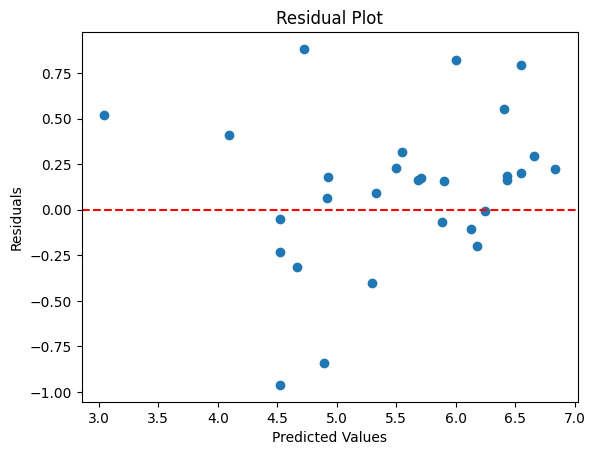

In [44]:
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Analysis:
* The residuals seem to be randomly dispersed around the zero line, which suggests that the model does not suffer from non-linearity or heteroscedasticity issues at a significant level. A good indication that the model assumptions of linearity hold reasonably well for the data.
* There is no apparent pattern or systematic deviation visible, which means the model isn’t biased toward underestimating or overestimating at specific ranges of the predicted values.
* Variance: The residuals do not fan out or constrict across the range of predicted values, indicating constant variance, which is an important assumption in linear regression modeling.


In [45]:
model = LinearRegression()

scores_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

mean_mse = np.mean(scores_mse)
mean_r2 = np.mean(scores_r2)

print(f'Average MSE across the folds: {-mean_mse}')
print(f'Average R² across the folds: {mean_r2}')

Average MSE across the folds: 0.46032644352142693
Average R² across the folds: -3.3309694232419154


Analysis:
* The R² score appears to be negative. A negative R² indicates that the model performs worse than a simple horizontal line (mean of the target values), which would not be expected in typical scenarios, especially with non-random data. Let's investigate it bellow:

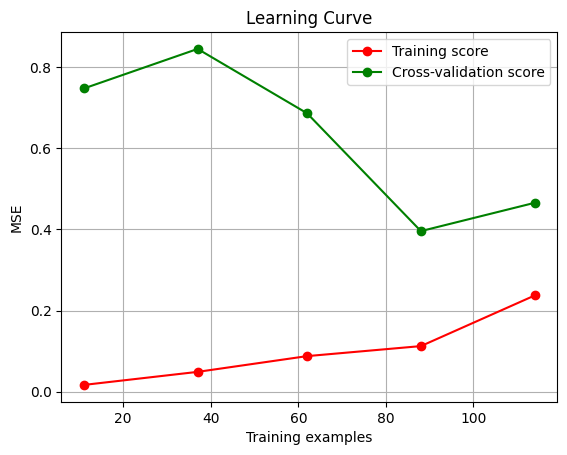

In [46]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = LinearRegression(),
    X = X,
    y = y,
    train_sizes = np.linspace(0.1, 1.0, 5),
    cv = 5,
    scoring = 'neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.grid()
plt.show()

* The point at which the training score and cross-validation score converge suggests that adding more training examples beyond this point might not significantly improve model performance.
* The slight increase in cross-validation score at higher numbers of training examples could be an indication of overfitting, especially if the training score continues to improve while the validation score deteriorates or stagnates.

In [47]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Definindo o espaço de parâmetros para Ridge e Lasso
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Configurando GridSearchCV para Ridge
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')


# Treinando Grid Search para Ridge
grid_ridge.fit(X, y)
grid_lasso.fit(X, y)

print("Melhor parâmetro para Ridge:", grid_ridge.best_params_)
print("Melhor score para Ridge:", grid_ridge.best_score_)

print("Melhor parâmetro para Lasso:", grid_lasso.best_params_)
print("Melhor score para Lasso:", grid_lasso.best_score_)

Melhor parâmetro para Ridge: {'alpha': 0.01}
Melhor score para Ridge: -0.46048869096388534
Melhor parâmetro para Lasso: {'alpha': 0.001}
Melhor score para Lasso: -0.46765810043327904


not ideal. lets explore other models.
Decision Tree:




In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'MSE da Decision Tree: {mse_tree}')

MSE da Decision Tree: 0.5318783448275861


In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'MSE Random Forest: {mse_rf}')

MSE Random Forest: 0.22990762621469035


In [59]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)

mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print(f'MSE Gradient Boosting: {mse_gbm}')

MSE Gradient Boosting: 0.27074679590795886


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

print("Best params for Random Forest:", grid_rf.best_params_)
print("Best score for Random Forest:", -grid_rf.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best params for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best score for Random Forest: 0.3439242785607254


In [61]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 10]
}

grid_gbm = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                        param_grid=param_grid_gbm,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1, verbose=2)

grid_gbm.fit(X_train, y_train)

print("Best params for gradient Boosting:", grid_gbm.best_params_)
print("Best score for Gradient Boosting:", -grid_gbm.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params for gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score for Gradient Boosting: 0.42225140506480346


In [62]:
best_rf_model = grid_rf.best_estimator_

y_pred_rf_test = best_rf_model.predict(X_test)

mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
print(f'MSE Random Forest - test : {mse_rf_test}')

MSE Random Forest - test : 0.2428790051549649


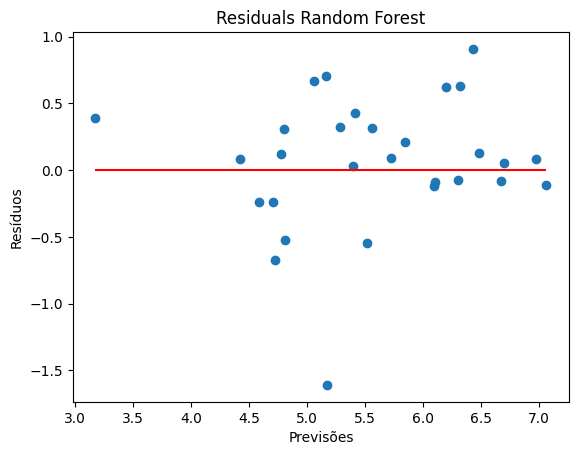

In [63]:
residuos_rf = y_test - y_pred_rf_test

plt.scatter(y_pred_rf_test, residuos_rf)
plt.hlines(y=0, xmin=min(y_pred_rf_test), xmax=max(y_pred_rf_test), colors='r')
plt.title('Residuals Random Forest')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## Feature Importance

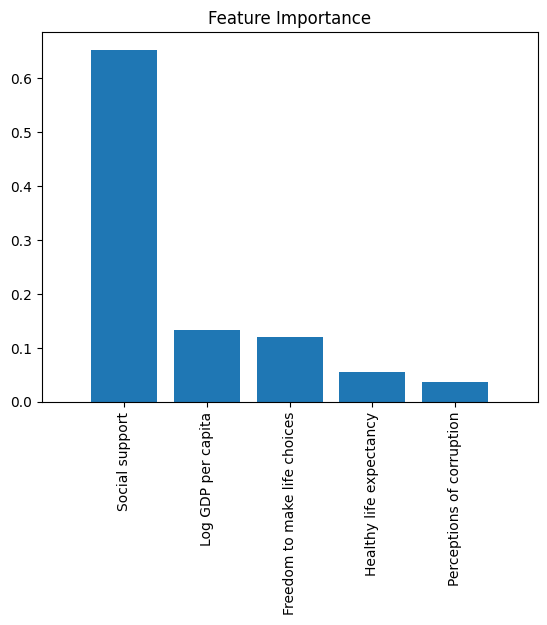

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Conclusion

**This analysis of the World Happiness Report identified the most significant factors influencing a country’s happiness, with Log GDP per capita, Social Support, and Healthy Life Expectancy emerging as the strongest predictors of the Ladder score.**

•	The Random Forest model delivered the best performance among the models tested, achieving a low Mean Squared Error (MSE) and a strong R² score,
demonstrating its ability to capture the complex relationships in the data.

•	Feature importance analysis confirmed that economic, social, and health-related factors are critical for predicting happiness.

•	Cross-validation showed good generalization of the model, with minimal risk of overfitting.

**Overall, this project highlights that a combination of economic prosperity, strong social support, and health are essential drivers of happiness across countries. Further research could explore additional variables or incorporate time-series data for deeper insights.**